In [3]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division
import numpy as np
%matplotlib inline



In [4]:
# TSLA,XOM stocks grab from yahoo
stock_list = ['TSLA','XOM']
end_date = datetime.now()
start_date = datetime(end_date.year - 1,end_date.month,end_date.day)
# grab the data from the Google
for stock in stock_list:
    globals()[stock] = DataReader(stock,'yahoo',start_date,end_date) 
    #or use 'google' to grab from google


In [5]:
TSLA.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-03,196.809998,200.240005,195.320007,199.559998,4432300,199.559998
2015-03-04,199.250000,202.520004,197.210007,202.440002,4222000,202.440002
2015-03-05,202.850006,206.190002,200.149994,200.630005,4877000,200.630005
2015-03-06,199.210007,200.750000,192.149994,193.880005,6712400,193.880005
2015-03-09,194.389999,194.490005,188.250000,190.880005,6736700,190.880005


In [6]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-03-03 to 2016-03-02
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [7]:
TSLA.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,226.798379,230.390909,222.744901,226.720752,4369830.039526,226.720752
std,28.570516,28.327314,29.081692,28.910457,2221682.235676,28.910457
min,142.320007,154.970001,141.050003,143.669998,708000.000000,143.669998
25%,207.699997,210.470001,203.850006,207.190002,2890900.000000,207.190002
50%,230.389999,233.270004,225.539993,230.380005,3850900.000000,230.380005
75%,249.539993,252.000000,246.000000,248.839996,5104300.000000,248.839996
max,280.200012,286.649994,276.299988,282.260010,14863300.000000,282.260010


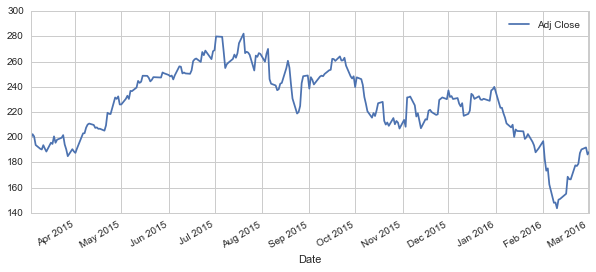

In [8]:
TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

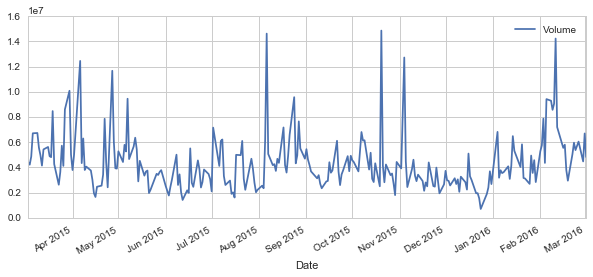

In [9]:
TSLA['Volume'].plot(legend=True,figsize=(10,4))

In [10]:
# Calculate Rolling Mean for few days (Moving Average)

In [11]:
mov_average_day = [5,10,15]

for mavday in mov_average_day:
    column_name = "MA for %s days"%(str(mavday))
#     set column name to the corresponding
    TSLA[column_name]=pd.rolling_mean(TSLA['Adj Close'],mavday)
# plot it


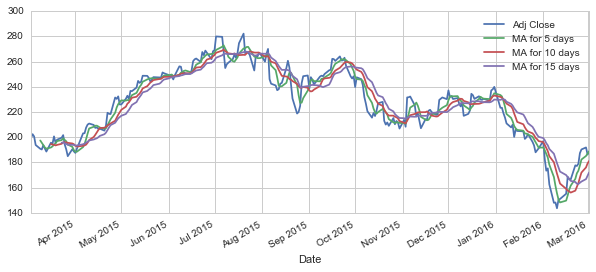

In [12]:
TSLA[['Adj Close','MA for 5 days','MA for 10 days','MA for 15 days']].plot(subplots=False,figsize=(10,4))

In [13]:
# Daily Retrun Analysis with percentage change
TSLA['Daily Return']=TSLA['Adj Close'].pct_change()

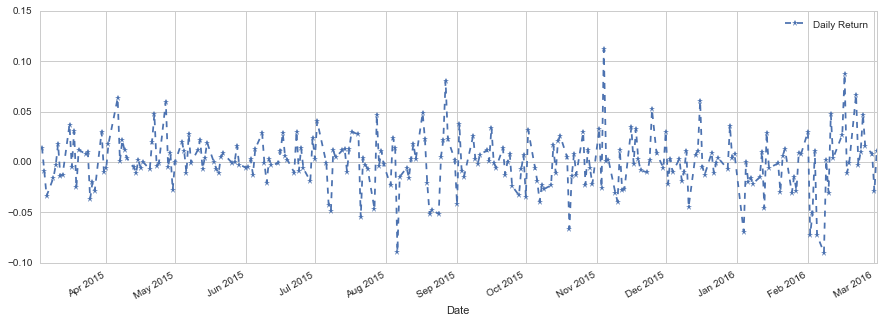

In [14]:
TSLA['Daily Return'].plot(figsize=(15,5),legend=True,linestyle='--',marker='*')

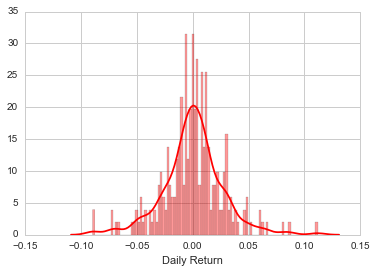

In [15]:
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='red')

In [16]:
# set closing price
closing = DataReader(['TSLA','XOM',],'yahoo',start_date,end_date)['Adj Close']

In [17]:
TSLA.head(),XOM.head()

(                  Open        High         Low       Close   Volume  \
 Date                                                                  
 2015-03-03  196.809998  200.240005  195.320007  199.559998  4432300   
 2015-03-04  199.250000  202.520004  197.210007  202.440002  4222000   
 2015-03-05  202.850006  206.190002  200.149994  200.630005  4877000   
 2015-03-06  199.210007  200.750000  192.149994  193.880005  6712400   
 2015-03-09  194.389999  194.490005  188.250000  190.880005  6736700   
 
              Adj Close  MA for 5 days  MA for 10 days  MA for 15 days  \
 Date                                                                    
 2015-03-03  199.559998            NaN             NaN             NaN   
 2015-03-04  202.440002            NaN             NaN             NaN   
 2015-03-05  200.630005            NaN             NaN             NaN   
 2015-03-06  193.880005            NaN             NaN             NaN   
 2015-03-09  190.880005     197.478003            

In [18]:
closing.head()

,TSLA,XOM
Date,,
2015-03-03,199.559998,84.583931
2015-03-04,202.440002,84.159175
2015-03-05,200.630005,83.734418
2015-03-06,193.880005,82.662880
2015-03-09,190.880005,82.209172


In [19]:
# find daily returns from closing dataframe
stock_returns = closing.pct_change()

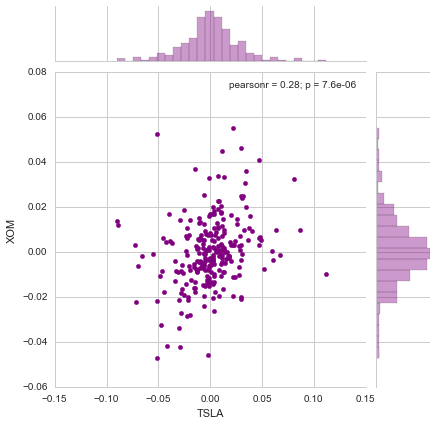

In [20]:
# compare two stocks daily return
sns.jointplot('TSLA','XOM',stock_returns,kind='scatter',color='purple')

# Reference
value between 1 <-> -1 is pearson r value, where 1 is more stronger (positive)corelation whereas -1 as negative relation

Reference - https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient#/media/File:Correlation_examples2.svg

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


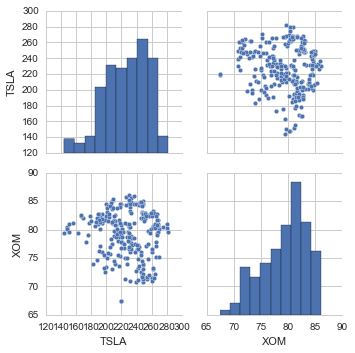

In [21]:
# Visual Analysis with pairplot
sns.pairplot(closing.dropna())

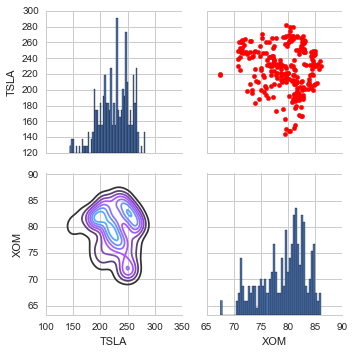

In [22]:
# more with kde plot using pairgrid
return_figure = sns.PairGrid(closing)
return_figure.map_upper(plt.scatter,color='red')
return_figure.map_lower(sns.kdeplot,cmap='cool_d')
return_figure.map_diag(plt.hist,bins=50)

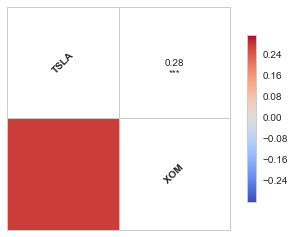

In [26]:
# heatmap with corrplot for daily stock_returns
sns.corrplot(stock_returns.dropna(),annot=True)

Risk Analysis with comparing daily percentage return and expected return with standard deviation of the daily returns


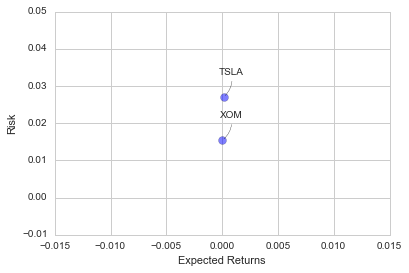

In [24]:
# clean existing closing dataframe 
returns = stock_returns.dropna()
areas = np.pi*20
plt.scatter(returns.mean(),returns.std(),alpha=0.5,s=areas)

# Axis Titles
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

# Scatter plot labelling 
for label,x,y in zip(returns.columns,returns.mean(),returns.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext=(20,20),
        textcoords='offset points',
        ha ='right',
        va='bottom',
        arrowprops = dict(arrowstyle ='-',connectionstyle='arc3,rad=-0.3')
    )


In [25]:
returns.mean(),returns.std()

(TSLA    0.000134
 XOM     0.000028
 dtype: float64, TSLA    0.027023
 XOM     0.015399
 dtype: float64)

Values At Risk for TESLA

In [29]:
days= 365
dt = 1/days
mu = returns.mean()['TSLA']
sigma = returns.std()['TSLA']

def monte_carlo(start_price,days,mu,sigma):
#     Price definition
    price = np.zeros(days)
    price[0]=start_price
    
#     shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
#     iterate for number of days
    for x in xrange(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
#         current price = previous price + previous + previous price * (drift +shock)
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    
    return price

In [30]:
TSLA.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 5 days,MA for 10 days,MA for 15 days,Daily Return
Date,,,,,,,,,,
2015-03-03,196.809998,200.240005,195.320007,199.559998,4432300,199.559998,NaN,NaN,NaN,NaN
2015-03-04,199.250000,202.520004,197.210007,202.440002,4222000,202.440002,NaN,NaN,NaN,0.014432
2015-03-05,202.850006,206.190002,200.149994,200.630005,4877000,200.630005,NaN,NaN,NaN,-0.008941
2015-03-06,199.210007,200.750000,192.149994,193.880005,6712400,193.880005,NaN,NaN,NaN,-0.033644
2015-03-09,194.389999,194.490005,188.250000,190.880005,6736700,190.880005,197.478003,NaN,NaN,-0.015473


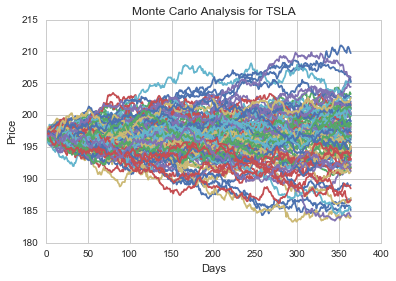

In [32]:
start_price = 196.80
# run it 100 times
for run in xrange(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for TSLA')

In [33]:
# Run for 10000 times
runs =10000
simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1]

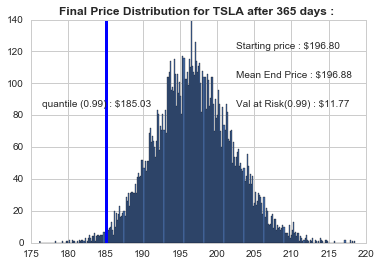

In [40]:
# plot it with quantile defination of risk with 1 % quantile
quant = np.percentile(simulations,1)
plt.hist(simulations,bins =300)
# set sstarting price
plt.figtext(0.6,0.8, s='Starting price : $%.2f'%start_price)
# Mean ending price
plt.figtext(0.6,0.7,'Mean End Price : $%.2f'%simulations.mean())

# Variation of the price with 99% confidence
plt.figtext(0.6,0.6, 'Val at Risk(0.99) : $%.2f'%(start_price - quant,))

#Display 1% quantile
plt.figtext(0.15,0.6,'quantile (0.99) : $%.2f'%quant)

# line at 1% quantile
plt.axvline(x=quant,linewidth=3,color='b')

plt.title('Final Price Distribution for TSLA after %s days : '%days,weight='bold')